In [2]:
import os, sys
os.chdir("C:\\Users\\benja\\OneDrive - ETHZ\\PhD\\Projects\\code\\ConveyorBelt")
sys.path.append("C:\\Users\\benja\\OneDrive - ETHZ\\PhD\\Projects\\code\\ConveyorBelt")

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

from src.system import system
from src.potential1D import harmonicOsc1D, envelopedPotential
from src.integrator import monteCarloIntegrator, metropolisMonteCarloIntegrator, positionVerletIntegrator, verlocityVerletIntegrator
from src.conditions.thermostats import berendsenThermostate
from visualisation.plotSimulations import static_sim_plots
from visualisation.animationSimulation import animation_trajectory


# Plots of Simulations

## Newtonian Integrator

In [2]:
#Simple Verlet integration simulation:
#UNDER DEVELOPMENT!
# The temperature is not constant!!!
#settings
sim_steps = 10
x_min, x_max = (-10, 10)
max_step_size = 2.0
pot=harmonicOsc1D()
thermo = berendsenThermostate(tau=3, dt=1)
integrator = positionVerletIntegrator(dt=1)#maxStepSize=max_step_size,
sys=system(potential=pot, integrator=integrator, conditions=[thermo], position=-10)

#simulate
cur_state = sys.simulate(sim_steps, withdrawTraj=True, initSystem=True)
print("init_state", sys.trajectory[0], "\n")
print("last_state: ",  sys.trajectory[-1], "\n")
print("Trajectory length: ",len(sys.trajectory))

#plot
static_sim_plots(sys, title="Monte Carlo Simulation", x_range=range(-10,11))

TypeError: 'complex' object is not iterable

# Animations of Simulations

INTEGRATOR: current forces	  -10.0
INTEGRATOR: current Velocities	  0
INTEGRATOR: current_position	  -10
INTEGRATOR: newVel	  5.0
INTEGRATOR: newPosition	  -5.0


INTEGRATOR: current forces	  -5.0
INTEGRATOR: current Velocities	  5.0
INTEGRATOR: current_position	  -5.0
INTEGRATOR: newVel	  5.0
INTEGRATOR: newPosition	  0.0


INTEGRATOR: current forces	  0.0
INTEGRATOR: current Velocities	  5.0
INTEGRATOR: current_position	  0.0
INTEGRATOR: newVel	  2.5
INTEGRATOR: newPosition	  2.5


INTEGRATOR: current forces	  2.5
INTEGRATOR: current Velocities	  2.5
INTEGRATOR: current_position	  2.5
INTEGRATOR: newVel	  0.0
INTEGRATOR: newPosition	  2.5


INTEGRATOR: current forces	  2.5
INTEGRATOR: current Velocities	  0.0
INTEGRATOR: current_position	  2.5
INTEGRATOR: newVel	  -1.25
INTEGRATOR: newPosition	  1.25


INTEGRATOR: current forces	  1.25
INTEGRATOR: current Velocities	  -1.25
INTEGRATOR: current_position	  1.25
INTEGRATOR: newVel	  -1.25
INTEGRATOR: newPosition	  0.0


INTEGRATOR: curr

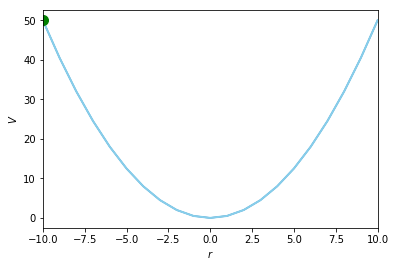

In [15]:
#Simple Verlet integration simulation:
#UNDER DEVELOPMENT!The temperature is not constant!!!
#settings
sim_steps = 10
x_min, x_max = (-10, 10)
max_step_size = 2.0
pot=harmonicOsc1D()
#thermo = berendsenThermostate(tau=3, dt=1, MConstraintsDims=-1)
#thermo.verbose = True
integrator = positionVerletIntegrator(dt=1)#maxStepSize=max_step_size,
integrator.verbose = True
sys=system(potential=pot, integrator=integrator,  position=-10)

#simulate
cur_state = sys.simulate(sim_steps, withdrawTraj=True, initSystem=True)
print("init_state", sys.trajectory[0], "\n")
print("last_state: ",  sys.trajectory[-1], "\n")
print("Trajectory length: ",len(sys.trajectory))

#animation
ani, out_path = animation_trajectory(sys, [x_min, x_max])

import tempfile
os.chdir(tempfile.gettempdir())
from IPython.display import HTML
HTML(ani.to_jshtml())

init_state State(position=-5, temperature=0, totEnergy=12.5, totPotEnergy=12.5, totKinEnergy=0.0, dhdpos=0, velocity=0) 

last_state:  State(position=-4.2073511408008156e+23, temperature=0, totEnergy=1.0369476483301209e+47, totPotEnergy=8.850901810998963e+46, totKinEnergy=1.518574672302245e+46, dhdpos=-1.7427419041856112e+23, velocity=-1.698614693617792e+23) 

Trajectory length:  100


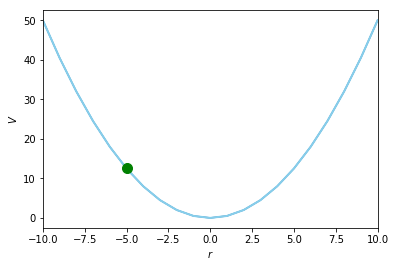

In [19]:
#Simple Verlet integration simulation:
#UNDER DEVELOPMENT!The temperature is not constant!!!
#settings
sim_steps = 100
x_min, x_max = (-10, 10)
max_step_size = 2.0
pot=harmonicOsc1D()
thermo = berendsenThermostate(tau=20, dt=1)
#thermo.verbose = True
integrator = verlocityVerletIntegrator(dt=1)#maxStepSize=max_step_size,
#integrator.verbose = True
sys=system(potential=pot, integrator=integrator, conditions=[thermo], position=-5, temperature=0)

#simulate
cur_state = sys.simulate(sim_steps, withdrawTraj=True, initSystem=True)
print("init_state", sys.trajectory[0], "\n")
print("last_state: ",  sys.trajectory[-1], "\n")
print("Trajectory length: ",len(sys.trajectory))

#animation
ani, out_path = animation_trajectory(sys, [x_min, x_max])

import tempfile
os.chdir(tempfile.gettempdir())
from IPython.display import HTML
HTML(ani.to_jshtml())